# 0.0 Imports

In [24]:
import warnings

import pandas as pd
import numpy  as np
import os

from matplotlib        import pyplot as plt
from sklearn.tree      import DecisionTreeRegressor
from sklearn           import metrics as mt
from sklearn.metrics   import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [25]:
warnings.filterwarnings('ignore')

# 1.0  Load Datasets

In [26]:
# executando o arquivo metrics_functions
get_ipython().run_line_magic('run', 'Metrics_functions.ipynb')

In [27]:
# carregando os dados
x_train, y_train, x_val, y_val, x_test, y_test = load_data('regressao')

# 2.0 Training Model

In [28]:
# treinamento 
Tree = DecisionTreeRegressor()
Tree.fit(x_train, y_train)

#predict
y_pred = Tree.predict(x_train) 

# performance
metrics(y_train, y_pred, 'Treinamento')

# guarando resultados
r2_train, mse_train, rmse_train, mae_train, mape_train = save_metrics(y_train, y_pred)

Metricas de Treinamento: 
R2:   0.992
MSE:  3.94
RMSE: 1.985
MAE:  0.214
MAPE: 0.083


## 2.1 Performance on Validation Data

In [29]:
# treinamento
Tree = DecisionTreeRegressor()
Tree.fit(x_train, y_train)

#predict
y_pred_val = Tree.predict(x_val)

#performance
metrics(y_val, y_pred_val, 'Validação')

# guardando resultados
r2_val, mse_val, rmse_val, mae_val, mape_val = save_metrics(y_val, y_pred_val)

Metricas de Validação: 
R2:   -0.295
MSE:  618.552
RMSE: 24.871
MAE:  17.136
MAPE: 6.866


## 2.2 Finding The best Parameter

### Parameter
* Max_depth

In [30]:
values = np.arange(1, 35, 1)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [31]:
for i in values:
    # treinamento
    Tree = DecisionTreeRegressor( max_depth = i)
    Tree.fit(x_train, y_train)

    #predict
    y_pred_val = Tree.predict(x_val)

    # performance
    r2, mse, rmse, mae, mape = save_metrics(y_val, y_pred_val)

    #guarando resultados
    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

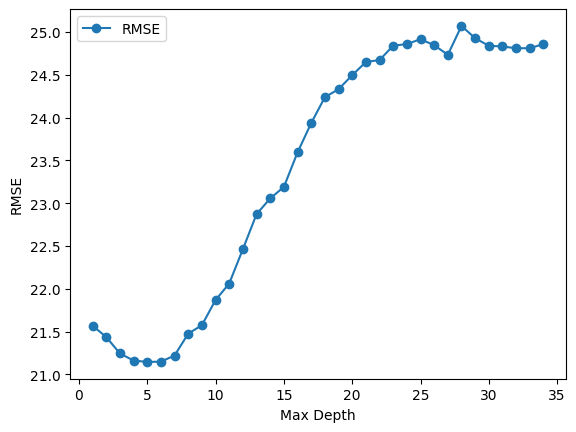

In [32]:
# Visualização da metrica
plt.plot(values, rmse_list, marker = 'o', label = 'RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.legend()

In [33]:
best_depth = values[np.argmin(rmse_list)]
best_depth

5

## 2.3 Performance on Test Data

In [34]:
# treinamento 
Tree = DecisionTreeRegressor(max_depth = best_depth)
Tree.fit(np.concatenate((x_train, x_val)),
         np.concatenate((y_train, y_val)))

#predict
y_pred_test = Tree.predict(x_test)

# performance
metrics(y_test, y_pred_test, 'Teste')

# guardando resultados
r2_test, mse_test, rmse_test, mae_test, mape_test = save_metrics(y_test, y_pred_test)

Metricas de Teste: 
R2:   0.09
MSE:  442.848
RMSE: 21.044
MAE:  16.83
MAPE: 7.883


# 3.0 Save Results

In [35]:
train_metrics = {
    'Algoritmo': 'Decision_Tree_Regressor',
    'R2'   : r2_train,
    'MSE'  : mse_train,
    'RMSE' : rmse_train,
    'MAE'  : mae_train, 
    'MAPE' : mape_train
}
validation_metrics = {
    'Algoritmo': 'Decision_Tree_Regressor',
    'R2'   : r2_val,
    'MSE'  : mse_val,
    'RMSE' : rmse_val,
    'MAE'  : mae_val, 
    'MAPE' : mape_val
}
test_metrics = {
    'Algoritmo': 'Decision_Tree_Regressor',
    'R2'   : r2_test,
    'MSE'  : mse_test,
    'RMSE' : rmse_test,
    'MAE'  : mae_test, 
    'MAPE' : mape_test
}

train = pd.DataFrame([train_metrics])
validation = pd.DataFrame([validation_metrics])
test = pd.DataFrame([test_metrics])

train.to_csv(
    './train_metrics_regressao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./train_metrics_regressao.csv')
)

validation.to_csv(
    './validation_metrics_regressao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./validation_metrics_regressao.csv')
)

test.to_csv(
    './test_metrics_regressao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./test_metrics_regressao.csv')
)